In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

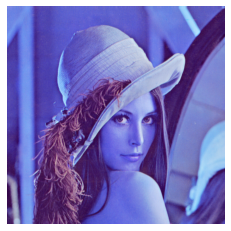

In [11]:
img = cv2.imread('./images/Lenna_(test_image).png')
plt.axis('off')
# plt.tight_layout(h_pad=0,w_pad=0)
plt.imshow(img)
plt.savefig('./images/hehe',bbox_inches='tight',pad_inches = 0)

In [19]:
def gkernel(l=3, sig=2):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [20]:
def padding(image):
    padded_image = np.zeros((image.shape[0]+2,image.shape[1]+2))
    padded_image[1:image.shape[0]+1,1:image.shape[1]+1]=image 
    return padded_image

In [26]:
def gaussian_filter(image,kernel_size,sigma):
    kernel = gkernel(kernel_size,sigma)
    new_img = np.zeros((image.shape[0],image.shape[1]))
    new_img = signal.convolve2d(image,kernel,mode='same',boundary='fill',fillvalue=0)
    return new_img

In [22]:
img = cv2.imread('./images/Lenna_(test_image).png',cv2.IMREAD_GRAYSCALE)

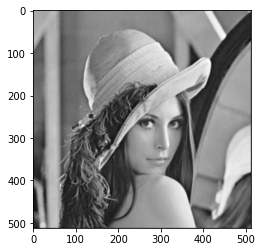

In [27]:
gass = gaussian_filter(img,3,1)
plt.imshow(gass,cmap='gray')

In [28]:
def median_filter(image_data,filter_size):
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]-1):
        for j in range(image_data.shape[1]-1):
            new_img[i][j] = np.median(padded[i:i+filter_size,j:j+filter_size])
    return new_img

In [34]:
def average_filter(image_data,filter_size):
    filter = np.ones((filter_size,filter_size))/(filter_size)**2
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    new_img = signal.convolve2d(image_data,filter,mode='same',boundary='fill',fillvalue=0)
    return new_img

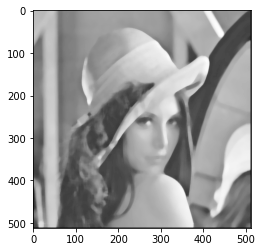

In [38]:
img_med = median_filter(img,11)
plt.imshow(img_med,cmap='gray')

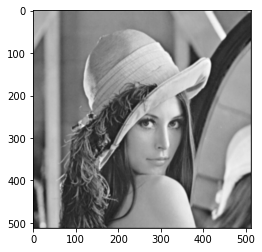

In [39]:
img_aver = average_filter(img,3)
plt.imshow(img_aver,cmap='gray')